<a href="https://colab.research.google.com/github/danieldovale/DMML2022_Tissot/blob/main/DMML_TeamTissot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Team Tissot

***Detecting the difficulty level of French texts***


To get started, let's import the required packages

In [1]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler

In [2]:
# Install and update spaCy
!pip install -U spacy

# Download the french language model
!python -m spacy download fr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-12-03 09:26:47.908898: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'fr' are deprecated. Please use the
full pipeline package name 'fr_core_news_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.3 MB 28.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [3]:
# Import required packages
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

Then, let's load the data and set "id" as the index column

In [4]:
# training data:
dfTrain = pd.read_csv("https://raw.githubusercontent.com/danieldovale/DMML2022_Tissot/main/data/training_data.csv", index_col='id')

# unlabeled test data:
dfTest = pd.read_csv("https://raw.githubusercontent.com/danieldovale/DMML2022_Tissot/main/data/unlabelled_test_data.csv", index_col='id')

Let's have a look on what it looks like:

In [5]:
dfTrain

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1
...,...,...
4795,"C'est pourquoi, il décida de remplacer les hab...",B2
4796,Il avait une de ces pâleurs splendides qui don...,C1
4797,"Et le premier samedi de chaque mois, venez ren...",A2


In [6]:
dfTest

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."
...,...
1195,C'est un phénomène qui trouve une accélération...
1196,Je vais parler au serveur et voir si on peut d...
1197,Il n'était pas comme tant de gens qui par pare...


## 1 Logistic Regression




>...

In [7]:
#Load English language model
sp = spacy.load("fr_core_news_sm")
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)
    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    # Return preprocessed list of tokens
    return mytokens

In [8]:
#TEST
spacy_tokenizer(dfTrain.iloc[324, 0])

['le',
 'bord',
 'de',
 'lac',
 'être',
 'vraiment',
 'magnifique',
 'et',
 'je',
 'faire',
 'beaucoup',
 'de',
 'sport',
 '.']

In [9]:
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the above defined tokenizer

In [10]:
from sklearn.pipeline import Pipeline

In [ ]:
#!Next code takes around 1 min!

In [11]:
X = dfTrain["sentence"]
y = dfTrain["difficulty"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)


# Define classifier
classifier = LogisticRegression(max_iter=1000)

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f3d212b4dc0>)),
                ('classifier', LogisticRegression(max_iter=1000))])

In [12]:
# Evaluate the model (had to add average param)
def evaluate(true, pred):
    precision = precision_score(true, pred, average = 'weighted')
    recall = recall_score(true, pred, average = 'weighted')
    f1 = f1_score(true, pred, average = 'weighted')
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

In [13]:
y_pred = pipe.predict(X_test)

In [14]:
f1_score(y_test, y_pred, average = None)

array([0.62941176, 0.40789474, 0.35064935, 0.41891892, 0.48916409,
       0.52722063])

In [15]:
# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[107  25  19   7   2   3]
 [ 35  62  40   9   3  10]
 [ 16  40  54  18  15  16]
 [  5   7  17  62  36  31]
 [  4   5  11  25  79  36]
 [ 10   6   8  17  28  92]]
ACCURACY SCORE:
0.4750
CLASSIFICATION REPORT:
	Precision: 0.4703
	Recall: 0.4750
	F1_Score: 0.4714


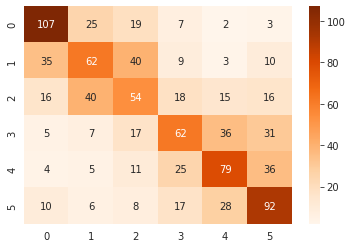

In [16]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.7g');